# Lab Instructions

You have been hired by a record executive to design a guaranteed smash hit song based on data.  The exec has decided that if you make a song that has all the most popular features of recent songs then it will definitely be a hit.  So if - for example - the most common key in the Spotify data is C# then we would want the song we are designing to also be in C#.  If a "typical" value of BPM is between 120 and 130 then we would want the song we are designing to also have a tempo between 120 and 130 BMP.

Visualize and describe the distribution of:
* BPM
* Key
* Mode
* Danceability
* Energy
* Speechiness
* Acousticness

Based on your visualizations and calculations, what values for each of these features would make a song a guaranteed smash hit?  For quantitative features, you should propose a range of values.

Use a large language model to help you write code to identify if there are any songs in the Spotify dataset that meet all of the criteria we determined.  What is/are the artist(s) and title(s) of the song?  Were any of these songs actually popular?

Pick a song that you know was a smash hit. How do the values of BPM, key, mode, danceability, etc. compare to other songs? 

**Hint:**  Import the Spotify data using `df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')`.

In [37]:
import pandas as pd

df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


<Axes: ylabel='Frequency'>

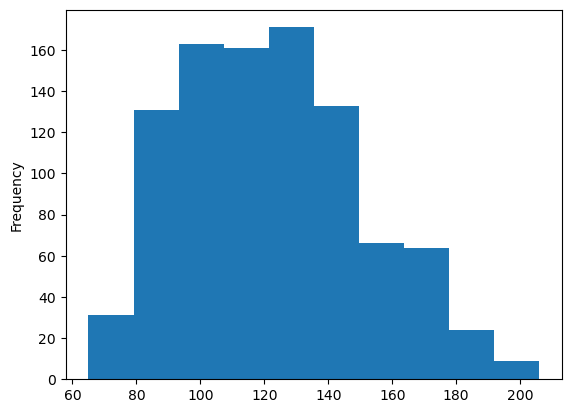

In [38]:
df['bpm'].plot(kind='hist')

In [39]:
df['bpm'].describe()

count    953.000000
mean     122.540399
std       28.057802
min       65.000000
25%      100.000000
50%      121.000000
75%      140.000000
max      206.000000
Name: bpm, dtype: float64

<Axes: xlabel='key'>

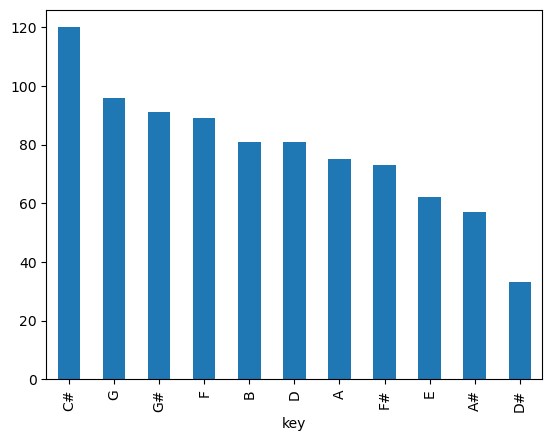

In [40]:
df['key'].value_counts().plot(kind='bar')

In [41]:
df['key'].describe()

count     858
unique     11
top        C#
freq      120
Name: key, dtype: object

<Axes: ylabel='count'>

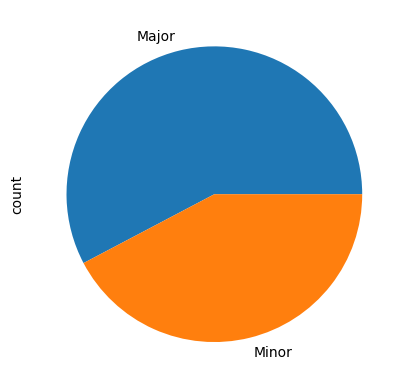

In [42]:
df['mode'].value_counts().plot(kind='pie')

In [43]:
df['mode'].value_counts()

mode
Major    550
Minor    403
Name: count, dtype: int64

count    953.00000
mean      66.96957
std       14.63061
min       23.00000
25%       57.00000
50%       69.00000
75%       78.00000
max       96.00000
Name: danceability_%, dtype: float64

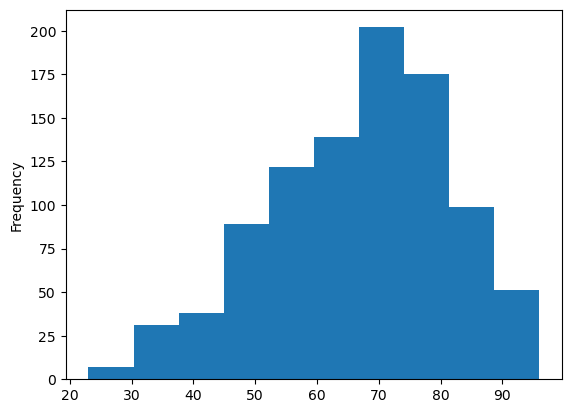

In [44]:
df['danceability_%'].plot(kind='hist')
df['danceability_%'].describe()

count    953.000000
mean      64.279119
std       16.550526
min        9.000000
25%       53.000000
50%       66.000000
75%       77.000000
max       97.000000
Name: energy_%, dtype: float64

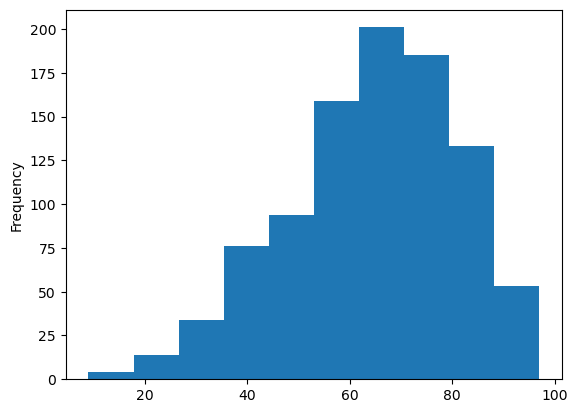

In [45]:
df['energy_%'].plot(kind='hist')
df['energy_%'].describe()

count    953.000000
mean      10.131165
std        9.912888
min        2.000000
25%        4.000000
50%        6.000000
75%       11.000000
max       64.000000
Name: speechiness_%, dtype: float64

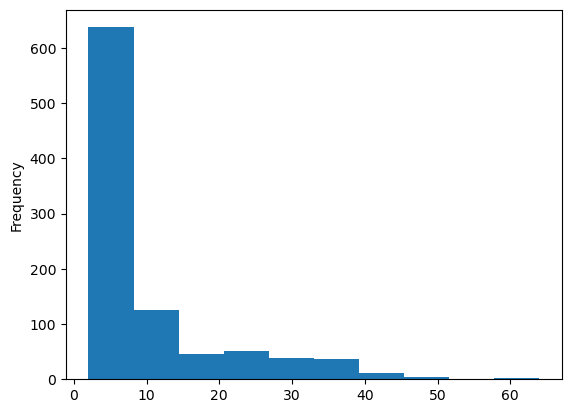

In [46]:
df['speechiness_%'].plot(kind='hist')
df['speechiness_%'].describe()

count    953.000000
mean      27.057712
std       25.996077
min        0.000000
25%        6.000000
50%       18.000000
75%       43.000000
max       97.000000
Name: acousticness_%, dtype: float64

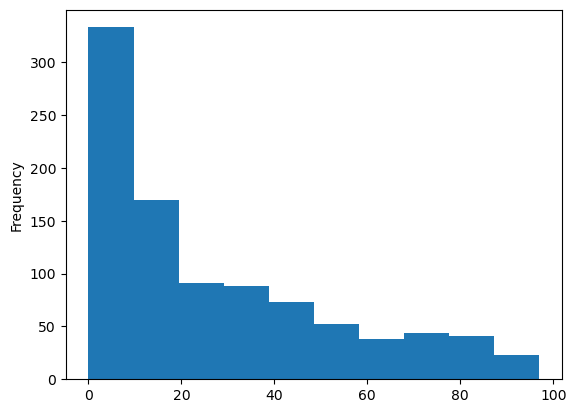

In [47]:
df['acousticness_%'].plot(kind='hist')
df['acousticness_%'].describe()

Text(0, 0.5, 'count')

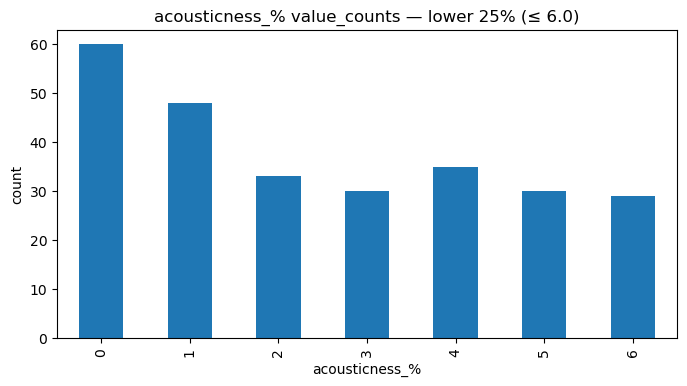

In [48]:
# lower 25% cutoff
q25 = df['acousticness_%'].quantile(0.25)

# subset and plot value_counts
lower_ac = df[df['acousticness_%'] <= q25]['acousticness_%']
vc = lower_ac.value_counts().sort_index()

ax = vc.plot(kind='bar', figsize=(8,4))
ax.set_title(f"acousticness_% value_counts — lower 25% (≤ {q25:.1f})")
ax.set_xlabel("acousticness_%")
ax.set_ylabel("count")

count    953.000000
mean      27.057712
std       25.996077
min        0.000000
25%        6.000000
50%       18.000000
75%       43.000000
max       97.000000
Name: acousticness_%, dtype: float64

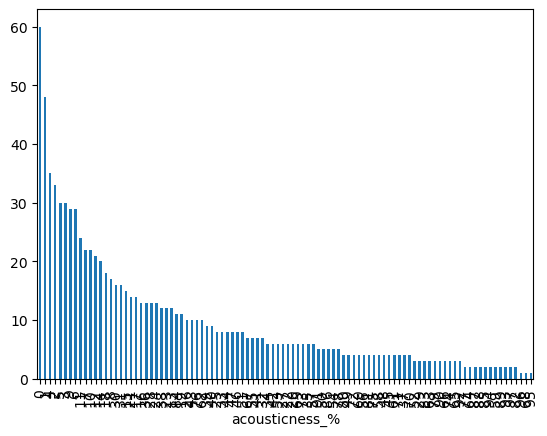

In [49]:
df['acousticness_%'].value_counts().plot(kind='bar')
df['acousticness_%'].describe()

count    953.000000
mean       1.581322
std        8.409800
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       91.000000
Name: instrumentalness_%, dtype: float64

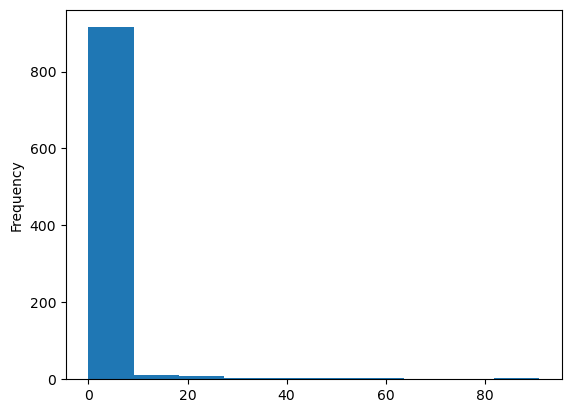

In [50]:
df['instrumentalness_%'].plot(kind='hist')
df['instrumentalness_%'].describe()

In [51]:

filtered_df = df.loc[(df['bpm'] >= 85) & (df['bpm'] <= 140) & (df['mode'] == 'Minor') & (df['key'] == 'A') ]

filtered_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
93,Donï¿½ï¿½ï¿½t Bl,Taylor Swift,1,2017,11,8,4875,23,685032533,19,...,136,A,Minor,62,19,53,11,0,6,4
120,LUNA,"Junior H, Peso Pluma",2,2023,6,22,201,11,55842345,19,...,128,A,Minor,75,79,63,33,0,15,4
131,OMG,NewJeans,1,2023,1,2,1783,27,430977451,26,...,127,A,Minor,80,74,77,36,0,11,4
150,Mi Bello Angel,Natanael Cano,1,2023,6,30,86,8,31873544,7,...,128,A,Minor,81,90,77,1,0,9,5
159,Under The Influence,Chris Brown,1,2019,10,4,3859,26,929964809,133,...,117,A,Minor,73,31,69,6,0,11,4


In [52]:
def filter_by_spotify_profile(
    df,
    method="average",            # "average" or "top"
    std_multiplier=1.0,         # used when method=="average"
    top_pct=0.10,               # top fraction used when method=="top" (e.g. 0.10 = top 10%)
    top_n_cat=3,                # number of top categorical values to keep when method=="top"
    numeric_cols=None,
    categorical_cols=None,
):
    """
    Build a profile (ranges / accepted categories) and return rows that match the profile.

    Parameters:
    - df: pandas.DataFrame (uses the notebook's df if you pass it)
    - method: "average" -> numeric: mean ± std_multiplier*std, categorical: top 1 value
              "top"     -> numeric: values in the top `top_pct` percentile, categorical: top `top_n_cat` values
    - std_multiplier: multiplier for std when method=="average"
    - top_pct: fraction (0-1) for top percentile when method=="top"
    - top_n_cat: number of top categories to select for categorical columns when method=="top"
    - numeric_cols: list of numeric column names to consider (defaults below)
    - categorical_cols: list of categorical column names (defaults below)

    Returns:
    - filtered_df: DataFrame with rows matching the profile
    - profile: dict describing ranges and allowed categories used for filtering
    """
    # default columns (match your notebook column names)
    if numeric_cols is None:
        numeric_cols = [
            "bpm",
            "energy_%",
            "speechiness_%",
            "danceability_%",
            "acousticness_%",
        ]
    if categorical_cols is None:
        categorical_cols = ["key", "mode"]

    profile = {"numeric": {}, "categorical": {}, "method": method}
    cond = pd.Series(True, index=df.index)

    # numeric logic
    for col in numeric_cols:
        if col not in df.columns:
            continue
        series = df[col].dropna().astype(float)
        if method == "average":
            m = series.mean()
            s = series.std()
            low = m - std_multiplier * s
            high = m + std_multiplier * s
        elif method == "top":
            # lower bound is the (1-top_pct) quantile, upper bound is max
            q = max(0.0, 1.0 - float(top_pct))
            low = series.quantile(q)
            high = series.max()
        else:
            raise ValueError("method must be 'average' or 'top'")

        profile["numeric"][col] = {"low": float(low), "high": float(high)}
        cond &= df[col].between(low, high)

    # categorical logic
    for col in categorical_cols:
        if col not in df.columns:
            continue
        vc = df[col].dropna().value_counts()
        if vc.empty:
            cats = []
        elif method == "average":
            cats = vc.index[:1].tolist()  # most common value
        else:  # top
            cats = vc.index[:top_n_cat].tolist()
        profile["categorical"][col] = {"accepted": cats}
        if cats:
            cond &= df[col].isin(cats)
        else:
            # if no accepted categories, filter nothing (no rows)
            cond &= False

    filtered_df = df.loc[cond].copy()
    return filtered_df, profile

# Example usage:
# filtered_df, profile = filter_by_spotify_profile(df, method="average", std_multiplier=1)
# filtered_df, profile = filter_by_spotify_profile(df, method="top", top_pct=0.10, top_n_cat=3)

numeric_cols = ["bpm", "danceability_%", "energy_%", "acousticness_%", "valence_%"]
categorical_cols = ["key", "mode"]
filtered_custom, profile_custom = filter_by_spotify_profile(
    df,
    method="average",
    std_multiplier=1.0,
    numeric_cols=numeric_cols,
    categorical_cols=categorical_cols,
)
print(f"Custom columns filter: {len(filtered_custom)} rows matched")
print(profile_custom)
display(filtered_custom.head())

Custom columns filter: 11 rows matched
{'numeric': {'bpm': {'low': 94.48259723266227, 'high': 150.59820024897468}, 'danceability_%': {'low': 52.338959905208434, 'high': 81.60017965407803}, 'energy_%': {'low': 47.72859259498239, 'high': 80.82964455087281}, 'acousticness_%': {'low': 1.0616351766797933, 'high': 53.053789797087255}, 'valence_%': {'low': 27.950637834820103, 'high': 74.91190151460277}}, 'categorical': {'key': {'accepted': ['C#']}, 'mode': {'accepted': ['Major']}}, 'method': 'average'}


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
79,CORAZï¿½ï¿½N VA,Maria Becerra,1,2023,6,22,370,20,43857627,12,...,98,C#,Major,68,40,79,33,0,30,6
107,Dandelions,Ruth B.,1,2017,4,28,3423,21,1116995633,41,...,117,C#,Major,61,45,69,2,0,9,3
168,We Found Love,"Rihanna, Calvin Harris",2,2011,1,1,36843,21,1235005533,321,...,128,C#,Major,73,60,77,3,0,11,4
225,Bite Me,ENHYPEN,1,2023,5,22,349,69,76767396,8,...,105,C#,Major,80,69,78,28,0,11,14
348,Red Ruby Da Sleeze,Nicki Minaj,1,2023,3,3,1168,0,81419389,45,...,98,C#,Major,70,29,73,12,0,11,26


In [53]:
# Examples of calling filter_by_spotify_profile (function defined in an earlier cell)

# 1) Average-based profile (mean ± 1 * std)
filtered_avg, profile_avg = filter_by_spotify_profile(df, method="average", std_multiplier=1.0)
print(f"Average-based filter: {len(filtered_avg)} rows matched")
print("Profile (numeric ranges and categorical accepted):")
print(profile_avg)
display(filtered_avg.head())

# 2) Tighter average (mean ± 0.5 * std) for a narrower "typical" range
filtered_tight, profile_tight = filter_by_spotify_profile(df, method="average", std_multiplier=0.5)
print(f"Tight average filter: {len(filtered_tight)} rows matched")
display(filtered_tight.head())

# 3) Top-based profile: top 10% for numeric cols, top 3 categories for categorical cols
filtered_top, profile_top = filter_by_spotify_profile(df, method="top", top_pct=0.10, top_n_cat=3)
print(f"Top-based filter: {len(filtered_top)} rows matched")
print(profile_top)
display(filtered_top.head())

# 4) Custom numeric/categorical columns
numeric_cols = ["bpm", "danceability_%", "energy_%", "acousticness_%", "valence_%"]
categorical_cols = ["key", "mode"]
filtered_custom, profile_custom = filter_by_spotify_profile(
    df,
    method="average",
    std_multiplier=1.0,
    numeric_cols=numeric_cols,
    categorical_cols=categorical_cols,
)
print(f"Custom columns filter: {len(filtered_custom)} rows matched")
print(profile_custom)
display(filtered_custom.head())

# 5) If you only want a concise result (track + artist)
if not filtered_avg.empty:
    print(filtered_avg[["track_name", "artist(s)_name"]].head())
else:
    print("No songs matched the average-based profile.")

Average-based filter: 10 rows matched
Profile (numeric ranges and categorical accepted):
{'numeric': {'bpm': {'low': 94.48259723266227, 'high': 150.59820024897468}, 'energy_%': {'low': 47.72859259498239, 'high': 80.82964455087281}, 'speechiness_%': {'low': 0.21827713315386, 'high': 20.044052352680346}, 'danceability_%': {'low': 52.338959905208434, 'high': 81.60017965407803}, 'acousticness_%': {'low': 1.0616351766797933, 'high': 53.053789797087255}}, 'categorical': {'key': {'accepted': ['C#']}, 'mode': {'accepted': ['Major']}}, 'method': 'average'}


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
79,CORAZï¿½ï¿½N VA,Maria Becerra,1,2023,6,22,370,20,43857627,12,...,98,C#,Major,68,40,79,33,0,30,6
106,Cold Heart - PNAU Remix,"Dua Lipa, Elton John, Pnau",3,2017,11,10,21097,52,1605224506,384,...,116,C#,Major,80,92,80,4,0,10,3
107,Dandelions,Ruth B.,1,2017,4,28,3423,21,1116995633,41,...,117,C#,Major,61,45,69,2,0,9,3
168,We Found Love,"Rihanna, Calvin Harris",2,2011,1,1,36843,21,1235005533,321,...,128,C#,Major,73,60,77,3,0,11,4
225,Bite Me,ENHYPEN,1,2023,5,22,349,69,76767396,8,...,105,C#,Major,80,69,78,28,0,11,14


Tight average filter: 1 rows matched


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
518,Need To Know,Doja Cat,1,2021,6,11,6672,0,1042568408,125,...,130,C#,Major,66,19,61,30,0,9,7


Top-based filter: 0 rows matched
{'numeric': {'bpm': {'low': 164.0, 'high': 206.0}, 'energy_%': {'low': 85.0, 'high': 97.0}, 'speechiness_%': {'low': 26.0, 'high': 64.0}, 'danceability_%': {'low': 84.0, 'high': 96.0}, 'acousticness_%': {'low': 71.0, 'high': 97.0}}, 'categorical': {'key': {'accepted': ['C#', 'G', 'G#']}, 'mode': {'accepted': ['Major', 'Minor']}}, 'method': 'top'}


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%


Custom columns filter: 11 rows matched
{'numeric': {'bpm': {'low': 94.48259723266227, 'high': 150.59820024897468}, 'danceability_%': {'low': 52.338959905208434, 'high': 81.60017965407803}, 'energy_%': {'low': 47.72859259498239, 'high': 80.82964455087281}, 'acousticness_%': {'low': 1.0616351766797933, 'high': 53.053789797087255}, 'valence_%': {'low': 27.950637834820103, 'high': 74.91190151460277}}, 'categorical': {'key': {'accepted': ['C#']}, 'mode': {'accepted': ['Major']}}, 'method': 'average'}


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
79,CORAZï¿½ï¿½N VA,Maria Becerra,1,2023,6,22,370,20,43857627,12,...,98,C#,Major,68,40,79,33,0,30,6
107,Dandelions,Ruth B.,1,2017,4,28,3423,21,1116995633,41,...,117,C#,Major,61,45,69,2,0,9,3
168,We Found Love,"Rihanna, Calvin Harris",2,2011,1,1,36843,21,1235005533,321,...,128,C#,Major,73,60,77,3,0,11,4
225,Bite Me,ENHYPEN,1,2023,5,22,349,69,76767396,8,...,105,C#,Major,80,69,78,28,0,11,14
348,Red Ruby Da Sleeze,Nicki Minaj,1,2023,3,3,1168,0,81419389,45,...,98,C#,Major,70,29,73,12,0,11,26


                  track_name              artist(s)_name
79           CORAZï¿½ï¿½N VA               Maria Becerra
106  Cold Heart - PNAU Remix  Dua Lipa, Elton John, Pnau
107               Dandelions                     Ruth B.
168            We Found Love      Rihanna, Calvin Harris
225                  Bite Me                     ENHYPEN


In [54]:
numeric_cols = ["bpm", "danceability_%", "energy_%", "acousticness_%", "speechiness_%"]
categorical_cols = ["key", "mode"]
filtered_custom, profile_custom = filter_by_spotify_profile(
    df,
    method="average",
    std_multiplier=1.0,
    numeric_cols=numeric_cols,
    categorical_cols=categorical_cols,
)
print(f"Custom columns filter: {len(filtered_custom)} rows matched")
print(profile_custom)
display(filtered_custom)

Custom columns filter: 10 rows matched
{'numeric': {'bpm': {'low': 94.48259723266227, 'high': 150.59820024897468}, 'danceability_%': {'low': 52.338959905208434, 'high': 81.60017965407803}, 'energy_%': {'low': 47.72859259498239, 'high': 80.82964455087281}, 'acousticness_%': {'low': 1.0616351766797933, 'high': 53.053789797087255}, 'speechiness_%': {'low': 0.21827713315386, 'high': 20.044052352680346}}, 'categorical': {'key': {'accepted': ['C#']}, 'mode': {'accepted': ['Major']}}, 'method': 'average'}


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
79,CORAZï¿½ï¿½N VA,Maria Becerra,1,2023,6,22,370,20,43857627,12,...,98,C#,Major,68,40,79,33,0,30,6
106,Cold Heart - PNAU Remix,"Dua Lipa, Elton John, Pnau",3,2017,11,10,21097,52,1605224506,384,...,116,C#,Major,80,92,80,4,0,10,3
107,Dandelions,Ruth B.,1,2017,4,28,3423,21,1116995633,41,...,117,C#,Major,61,45,69,2,0,9,3
168,We Found Love,"Rihanna, Calvin Harris",2,2011,1,1,36843,21,1235005533,321,...,128,C#,Major,73,60,77,3,0,11,4
225,Bite Me,ENHYPEN,1,2023,5,22,349,69,76767396,8,...,105,C#,Major,80,69,78,28,0,11,14
449,Snowman,Sia,1,2017,1,1,5140,0,690104769,85,...,105,C#,Major,72,33,51,48,0,9,3
518,Need To Know,Doja Cat,1,2021,6,11,6672,0,1042568408,125,...,130,C#,Major,66,19,61,30,0,9,7
525,One Right Now (with The Weeknd),"The Weeknd, Post Malone",2,2021,11,5,4771,0,539595276,68,...,97,C#,Major,68,72,78,4,0,7,5
660,Ginseng Strip 2002,Yung Lean,1,2013,8,16,4310,0,240769997,13,...,115,C#,Major,60,37,71,8,0,48,4
734,In My Head,Lil Tjay,1,2022,4,1,1185,0,190981339,21,...,143,C#,Major,68,41,55,16,0,10,12
